___

<a href='https://github.com/ai-vithink'> <img src='https://avatars1.githubusercontent.com/u/41588940?s=200&v=4' /></a>
___

# Distribution Plots

Let's discuss some plots that allow us to visualize the distribution of a data set. These plots are:

* distplot
* jointplot
* pairplot
* rugplot
* kdeplot

In [1]:
import seaborn as sns
import scipy.stats as stats

In [2]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')
# To hide warnings, which won't change the desired outcome.

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
%matplotlib inline
sns.set_style('darkgrid')

* Inline to show plots in jupyter notebook.
* Darkgrid to show background grid in seaborn. Don't include if you prefer plots with white plain background.

## Data
Seaborn comes with built-in data sets!

In [5]:
# Grabbing tips dataset and saving it with same name.
tips = sns.load_dataset('tips')

In [6]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 3px  black solid !important;
  color: black !important;
}
# For having gridlines 

In [7]:
tips.head() #Data showing people who had a meal, relatead info and how much tip they left.

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## distplot

The distplot shows the distribution of a univariate set of observations.

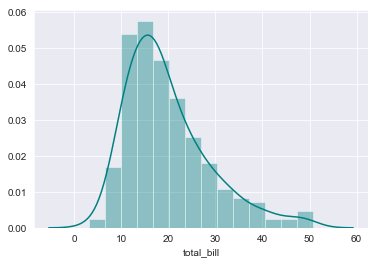

In [8]:
# Univariate is scientific way of saying one variable.
sns.distplot(tips['total_bill'],color='teal')  # Seeing how total bill is distributed


* Passing single column of dataframe.
* In case you get a warning then do not worry about it, it is a potential conflict with another package stats models, but that won't affect your sns.distplot().
* What we get is a histrogram or KDE Kernel Density Estimation. 
* More on KDE later. KDE can be removed to retain just the histrogram part as well, as shown below.

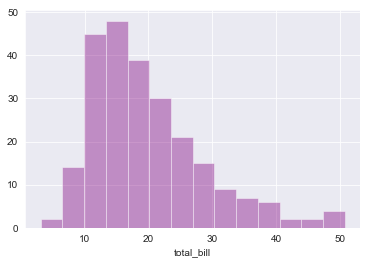

In [9]:
sns.distplot(tips['total_bill'],color='purple',kde=False)
# Just a distribution with frequency giving us an idea of where the total bill lies.
# By frequency of bars one can easily tell

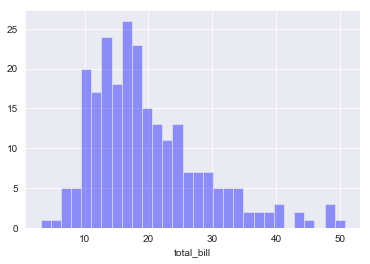

In [10]:
# To get more info we can change number of bins
sns.distplot(tips['total_bill'],color='blue',kde=False,bins=30)

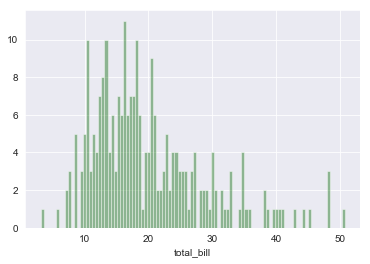

In [11]:
# If you increase the number of bins way too much then you go towards a scenario where you discretely plot every single value.
sns.distplot(tips['total_bill'],color='darkgreen',kde=False,bins=100)

In [12]:
# That was distplot() allows you to analyse a distribution, specifically a histrogram.

## jointplot

jointplot() allows you to basically match up two distplots for bivariate data. With your choice of what **kind** parameter to compare with: 
* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”

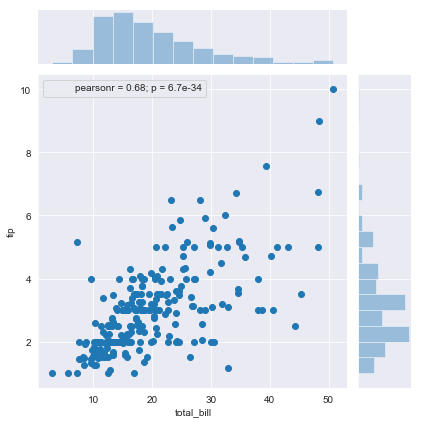

In [13]:
# We can combine 2 different distribution plots. Bivariate = 2 variables.
a = sns.jointplot(x='total_bill',y='tip',data=tips) # sns.jointplot(x variable = ,y variable = , dataset)
a.annotate(stats.pearsonr) # To get pearson value, p coefficient
# More on p coefficient when discussing linear regression.

* We get 2 distribution plots with y axis having tip and total_bill on x axis.
* Notice as we move on x-axis 2 things happen :
    1. Number of dots decrease, showing how there are less bills in 40-50 dollar category when compared with 10-30 dollars.
    2. Tip amount increases, shown on y axis as we move towards the higher amount of bill on x axis, which makes sense as tips are proportional to bill amount.

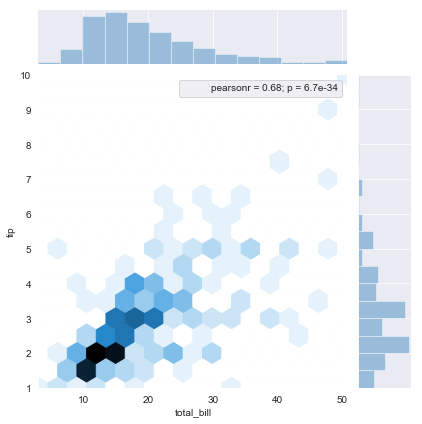

In [14]:
# Joint plots have additional argument parameter called kind.
# Kind allows us to modify what is going on inside the jointplot().
a = sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')
a.annotate(stats.pearsonr)


* Above makes hexagonal distribution representation Hex is dark for a large number of points in a region and lighter for less number of points.
* Hex looks more clean while at the same time distinuguishably telling us which is the area with most number of plots, and which is the one with no or least number of plots.

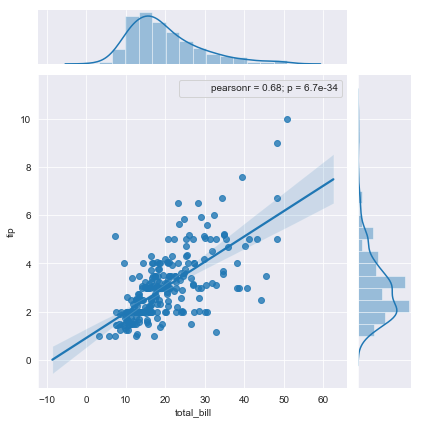

In [15]:
# Another argument with kind is reg = regression. We'll learn more about it later.
a = sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')
a.annotate(stats.pearsonr)
# Seaborn draws a regression line. Linear Regression is a machine learning (ML) topic.
# We'll return to this topic when discussing ML and how this line is made.

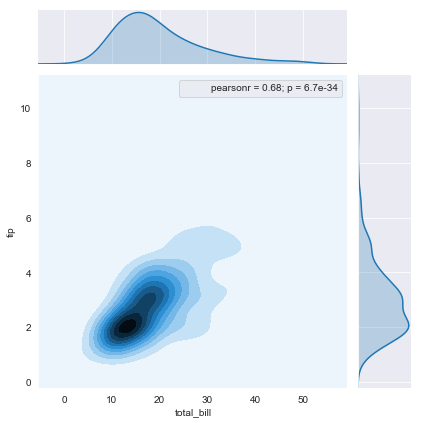

In [16]:
# Another kind is kde which shows up where the points match up the most.
a = sns.jointplot(x='total_bill',y='tip',data=tips,kind='kde')
a.annotate(stats.pearsonr)

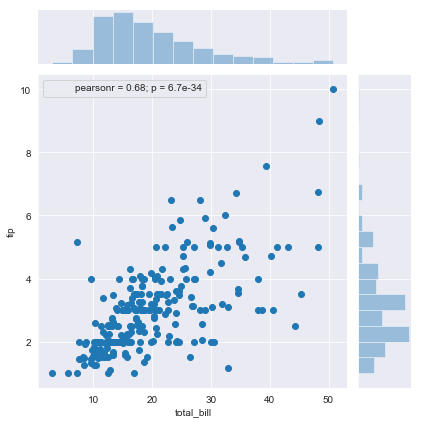

In [17]:
# We'll use joint plot with default scatter most often as it is easiest to interpret and read.
a = sns.jointplot(x='total_bill',y='tip',data=tips)
a.annotate(stats.pearsonr)

## pairplot

pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns). 

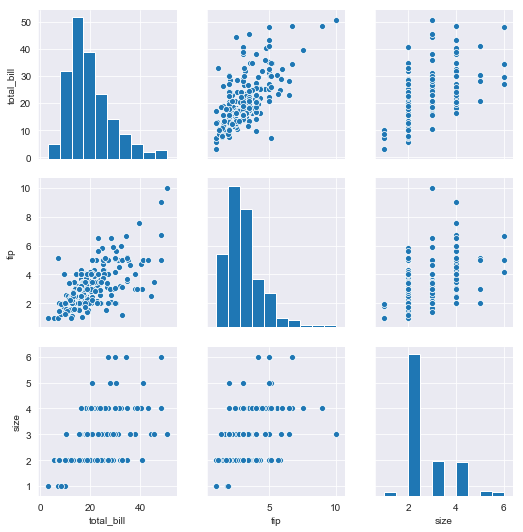

In [18]:
sns.pairplot(tips)
# Essentially this makes bivariate (joint plot) for every numerical column in dataframe
# Larger the dataframe, the more time pairplot takes.

* In pairplot whenever in the grid there is a parameter vs same parameter then instead of getting a scatterplot, we see a histrogram.
* Pairplot is a efficient way to quickly visualise your data. Also hue can be added.
* In hue we pass in the column name of a categorical column. Categorical means columns having actual categories, like gender and AC Seat Class A,B,C etc. and not numerical columns.

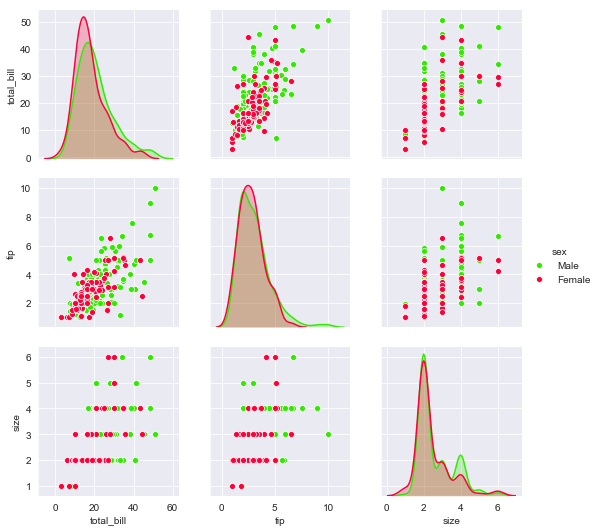

In [19]:
sns.pairplot(tips,hue='sex',palette='prism')
# Colors the pair plot based on the categorical column supplied to hue parameter.
# Palette allows us to colour the plots using specific predefined formats. We'll learn more about
# the colors, styles at the end of the seaborn lecture series. This is just an example.

## rugplot

rugplots are actually a very simple concept, they just draw a dash mark for every point on a univariate distribution. They are the building block of a KDE plot:

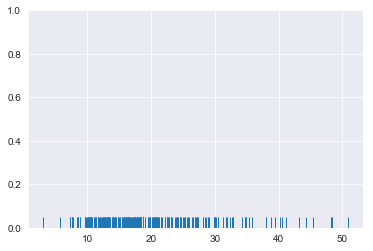

In [20]:
sns.rugplot(tips['total_bill']) # just like distplot we pass in a single column here.

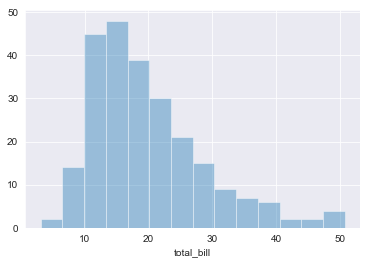

In [21]:
sns.distplot(tips['total_bill'],kde=False)

* Difference between distplot and rugplot is that distplot has histrogram and keeps a record of number of dashes and shows them vertically as frequency on y axis, while rugplot does not do that.

##### How to make KDE line based off of rugplot ?

* References :
    * https://en.wikipedia.org/w/index.php?title=Kernel_density_estimation
    * https://en.wikipedia.org/wiki/Normal_distribution

* KDE has relation to rugged plot count. 
* KDE plots stands for kernel density estimation plots.
* We will try to generate the following figure : 
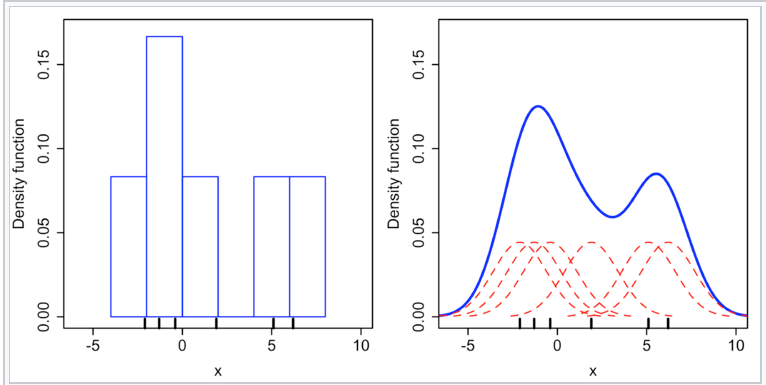

* Black dashes represent the rug point, and there are normal gaussian distributions on top of each point, when we sum them all up we get the final kde.

* What we mean by normal distribution or gaussian distribution, in probability theory it is the most common probability distribution, these are normal distributions which generally represent most of the daily life visualisations like test scores, a normalized plot, age, height of a set of population etc.
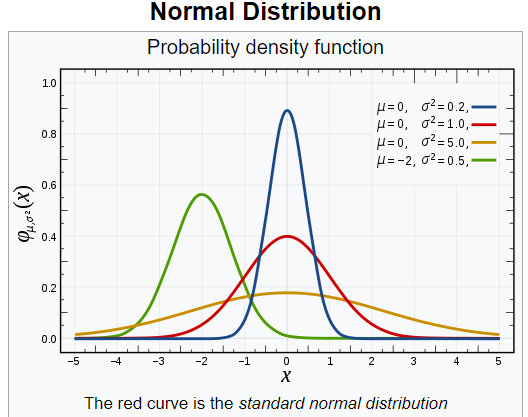

## kdeplot

kdeplots are [Kernel Density Estimation plots](http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth). These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value. For example:

(0, 1)

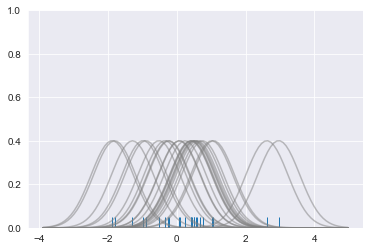

In [22]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25) # dataset of random data

# Create another rugplot
sns.rugplot(dataset); # rugplot on random data

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100) # use linspace to make 100 equally spaced points from x_min to 
# x_max

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    # Plots a normal distribution for each of the rugged plot points.
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    # Grey lines represent normal distribution on top of each of the blue dashes.
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)
# Next we sum all the normal distributions to get the kernel density basis function.

Text(0.5, 0.98, 'Sum of the Basis Functions')

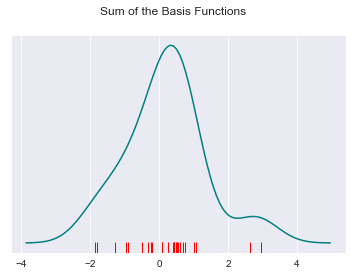

In [23]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='teal')

# Add the initial rugplot
sns.rugplot(dataset,c = 'red')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

* We can get KDE plot using rugplot or using distplot.
* If we are using distplot, then we can get rid of kde plot by using kde=False, but if we actually
* just want the kde and not the bins in background then we can pass kdeplot instead of distplot.


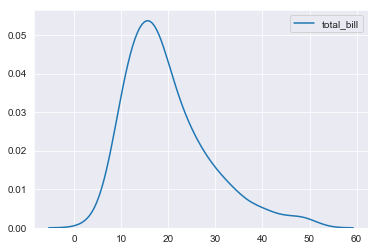

In [24]:
sns.kdeplot(tips['total_bill'])

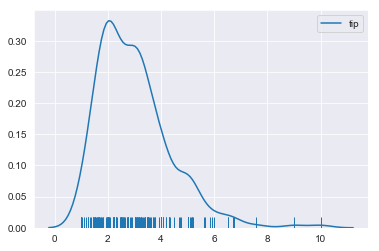

In [25]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])